<a href="https://colab.research.google.com/github/aipalak/CV-DL/blob/main/ANN_teras_1Make%20Circle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from sklearn.datasets import make_circles,make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense

In [4]:
data,target=make_circles(n_samples=1000,noise=0.03)

In [6]:
data[:5]

array([[ 0.64214527,  0.52113583],
       [ 0.62958848, -0.80626864],
       [-0.23509834,  0.72629552],
       [ 0.808208  ,  0.58366377],
       [-0.78086777,  0.09308901]])

In [7]:
target[:5]

array([1, 0, 1, 0, 1])

<function matplotlib.pyplot.show(close=None, block=None)>

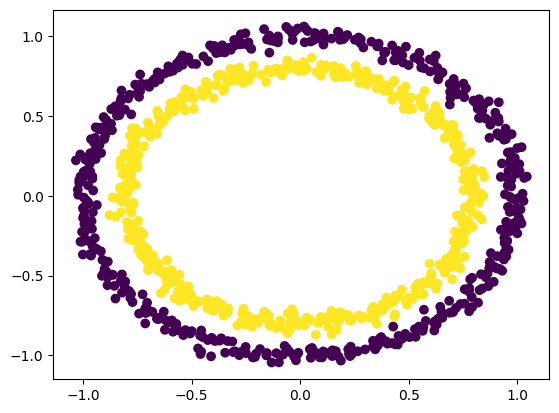

In [10]:
plt.scatter(data[:,0],data[:,1],c=target)
plt.show

In [55]:
model=Sequential([
    Input(shape=[2]),
    Dense(4,activation="relu"),
    Dense(5,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [56]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 12        
                                                                 
 dense_13 (Dense)            (None, 5)                 25        
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [57]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.25)

In [19]:
x_train.shape

(750, 2)

In [20]:
y_train.shape

(750,)

In [59]:
losses=tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss=losses,metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=120,validation_data=(x_test,y_test))

Epoch 1/120
24/24 [==============================] - 1s 10ms/step - loss: 0.5112 - accuracy: 0.8307 - val_loss: 0.4968 - val_accuracy: 0.8240
Epoch 2/120
24/24 [==============================] - 0s 4ms/step - loss: 0.5073 - accuracy: 0.8320 - val_loss: 0.4952 - val_accuracy: 0.8280
Epoch 3/120
24/24 [==============================] - 0s 3ms/step - loss: 0.5037 - accuracy: 0.8307 - val_loss: 0.4934 - val_accuracy: 0.8240
Epoch 4/120
24/24 [==============================] - 0s 3ms/step - loss: 0.5003 - accuracy: 0.8333 - val_loss: 0.4885 - val_accuracy: 0.8240
Epoch 5/120
24/24 [==============================] - 0s 4ms/step - loss: 0.4973 - accuracy: 0.8400 - val_loss: 0.4843 - val_accuracy: 0.8440
Epoch 6/120
24/24 [==============================] - 0s 4ms/step - loss: 0.4947 - accuracy: 0.8413 - val_loss: 0.4833 - val_accuracy: 0.8440
Epoch 7/120
24/24 [==============================] - 0s 4ms/step - loss: 0.4921 - accuracy: 0.8400 - val_loss: 0.4813 - val_accuracy: 0.8320
Epoch 8/120


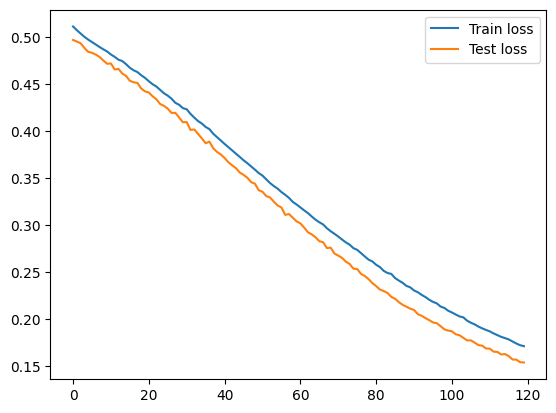

In [60]:
plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'],label="Test loss")
plt.legend()
plt.show()

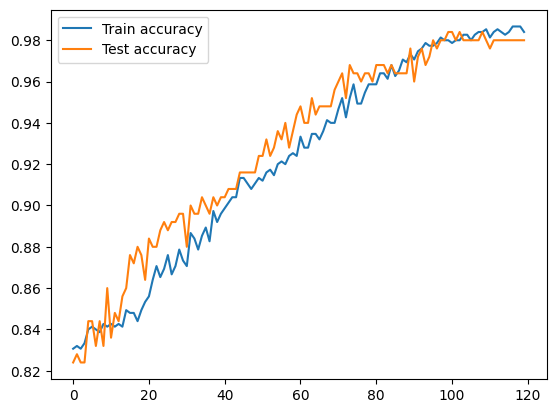

In [61]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'],label="Test accuracy")
plt.legend()
plt.show()

In [62]:
y_pred=model.predict(x_test)

8/8 [==============================] - 0s 2ms/step


In [63]:
y_pred=np.round(y_pred)

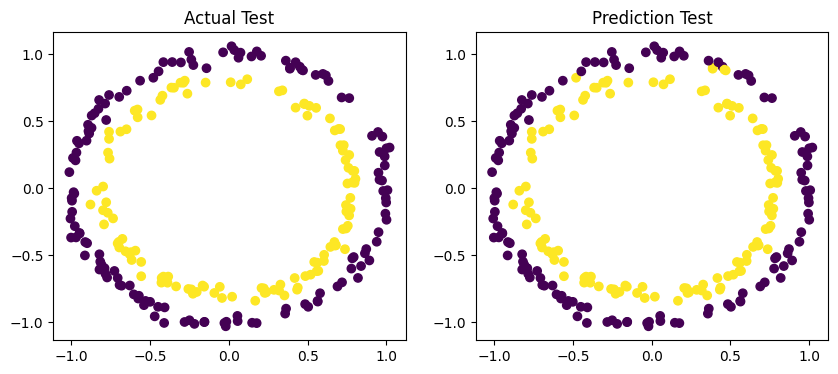

In [64]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Actual Test")
plt.scatter(x_test[:,0], x_test[:,1], c=y_test)
plt.subplot(1,2,2)
plt.title("Prediction Test")
plt.scatter(x_test[:,0], x_test[:,1], c=y_pred)
plt.show()